# Dataset 2

In [3]:
import numpy as np
import pandas as pd
import re
import itertools
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sb
import nltk

## Exploring the Dataset

In [4]:
# loading the dataset to a pandas dataframe
news_dataset = pd.read_csv('Documents/COLLEGE/THESIS/DATASET/dataset1.csv')

In [5]:
# number of (rows, columns) = (news articles, features)
news_dataset.shape

(4594, 4)

In [6]:
# print the first 5 rows of the dataframe
news_dataset.head()

,idd,title,text,label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL


## Initializing Dataset

In [7]:
# replacing values in the 'label' column
news_dataset['label'] = news_dataset['label'].replace({'REAL': 0, 'FAKE': 1})

In [8]:
#removing the 'idd' column
news_dataset.drop('idd', axis=1, inplace=True)

In [9]:
news_dataset.head()

,title,text,label
0,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,0
1,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,0
2,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",0
3,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,0
4,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,0


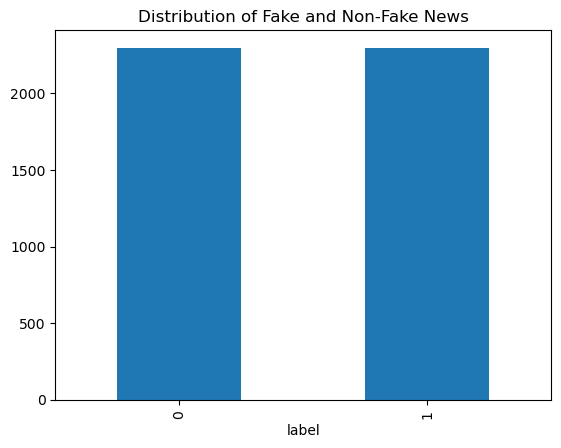

In [12]:
news_dataset['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Fake and Non-Fake News')
plt.show()

## Data Cleaning

### <font color=orange> Handling Missing Values

In [13]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [14]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

### <font color=orange>Removing Duplicate Entries

In [15]:
#checking for duplicated values
news_dataset.duplicated(['title', 'text'])

0       False
1       False
2       False
3       False
4       False
        ...  
4589    False
4590    False
4591    False
4592    False
4593    False
Length: 4594, dtype: bool

### <font color=orange> Merging Columns

In [16]:
# merging the author name and news title
news_dataset['content'] = news_dataset['text']+' '+news_dataset['title']

In [17]:
# Drop 'text' and 'title' columns
news_dataset.drop(columns=['text', 'title'], inplace=True)

In [18]:
news_dataset.head()

,label,content
0,0,UPDATE: Gov. Fallin vetoed the bill on Friday....
1,0,Ever since Texas laws closed about half of the...
2,0,"Donald Trump and Hillary Clinton, now at the s..."
3,0,A Houston grand jury investigating criminal al...
4,0,WASHINGTON -- Forty-three years after the Supr...


## Text Normalization

### <font color=orange> Separating Columns

In [19]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [20]:
print(X)
print(Y)

                                                content
0     UPDATE: Gov. Fallin vetoed the bill on Friday....
1     Ever since Texas laws closed about half of the...
2     Donald Trump and Hillary Clinton, now at the s...
3     A Houston grand jury investigating criminal al...
4     WASHINGTON -- Forty-three years after the Supr...
...                                                 ...
4589  License DMCA \nCold War 2.0 has reached unprec...
4590  Print \nSen. Bernie Sanders laid out the ways ...
4591  As the pressure to start construction on the D...
4592  Tweet Home » Gold » Gold News » Currency Crisi...
4593  Written by Eric Margolis   As a former soldier...

[4594 rows x 1 columns]
0       0
1       0
2       0
3       0
4       0
       ..
4589    1
4590    1
4591    1
4592    1
4593    1
Name: label, Length: 4594, dtype: int64


### <font color=orange> Stemming

In [21]:
# initialize the Porter Stemmer
port_stem = PorterStemmer()

In [22]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) #removes non alphabets and replaces it with space
    stemmed_content = stemmed_content.lower() #lowercasing
    stemmed_content = stemmed_content.split() #tokenizing
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #removing stopwords
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [23]:
news_dataset['content'] = news_dataset['content'].apply(stemming) #stemming

In [24]:
print(news_dataset['content'])

0       updat gov fallin veto bill friday head lawmak ...
1       ever sinc texa law close half state abort clin...
2       donald trump hillari clinton start line gener ...
3       houston grand juri investig crimin alleg plan ...
4       washington forti three year suprem court estab...
                              ...                        
4589    licens dmca cold war reach unpreced hyster lev...
4590    print sen berni sander laid way would leverag ...
4591    pressur start construct dakota access pipelin ...
4592    tweet home gold gold news currenc crisi alasda...
4593    written eric margoli former soldier war corres...
Name: content, Length: 4594, dtype: object


## Separating the data and label

In [25]:
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [26]:
print(X)

['updat gov fallin veto bill friday head lawmak oklahoma approv bill thursday would make perform abort feloni revok medic licens physician assist procedur sweep measur oppon describ unconstitut unpreced head gov mari fallin r five day includ sunday decid whether sign bill veto allow becom law without signatur accord spokesman governor withhold comment bill bill staff chanc review michael mcnutt spokesman fallin said email oklahoma bill first measur kind accord center reproduct right say state seek ban abort simpli ban procedur rather attach penalti like accord measur known sb person perform induc abort guilti feloni punish one three year state penitentiari legisl also say physician particip abort deem unprofession conduct bill prohibit obtain renew licens practic medicin state howev medic licens strip doctor perform abort deem necessari save mother life ye hospit perform abort c doctor say hospit let talk bill pass oklahoma hous repres vote last month thursday state senat pass vote sin

In [27]:
print(Y)

[0 0 0 ... 1 1 1]


In [28]:
Y.shape

(4594,)

<Axes: xlabel='label', ylabel='count'>

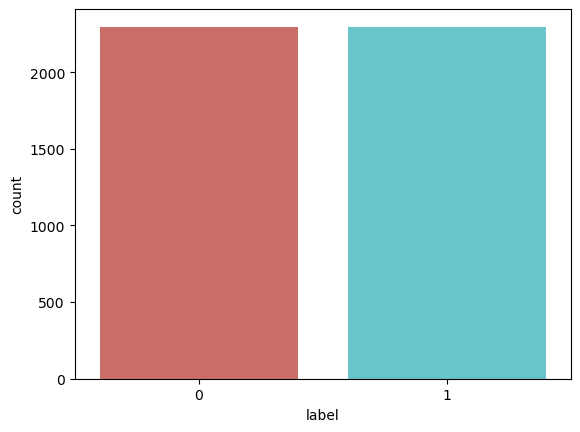

In [29]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(news_dataset)

### <font color=orange> TF-IDF Vectorizer

In [30]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [31]:
print(X)

  (0, 36052)	0.015706737735804065
  (0, 36049)	0.01667810569713532
  (0, 35820)	0.028926367861810163
  (0, 35755)	0.044325953178851615
  (0, 35645)	0.03953966587737033
  (0, 35642)	0.01517469114223258
  (0, 35577)	0.012332100323765244
  (0, 35574)	0.028307011171975805
  (0, 35366)	0.014931363480328471
  (0, 35272)	0.01170573433527243
  (0, 35106)	0.009926813487458695
  (0, 34967)	0.022055981525144677
  (0, 34815)	0.016083841053248532
  (0, 34784)	0.14364049752243782
  (0, 34733)	0.0190658510264703
  (0, 34723)	0.0400968590843506
  (0, 34669)	0.016763979282186425
  (0, 34507)	0.012761752085330492
  (0, 34468)	0.016030365780757536
  (0, 34440)	0.10848300050240109
  (0, 34046)	0.035287685799980685
  (0, 33978)	0.03959057936017262
  (0, 33771)	0.03501593132806075
  (0, 33762)	0.01998417074268865
  (0, 33369)	0.07903433344846438
  :	:
  (4593, 2253)	0.0326998605503956
  (4593, 2239)	0.029060758167625968
  (4593, 2123)	0.04589917234263127
  (4593, 2074)	0.12753646048465178
  (4593, 2047)	0.0

### Spliiting the Dataset

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

### <font color=pink> Create Scores Function </font>

In [35]:
def scores(model, X_train, Y_train, X_test, Y_test):
    # Training Set Metrics
    X_train_prediction = model.predict(X_train)
    cm_train = metrics.confusion_matrix(Y_train, X_train_prediction)
    recall_train = metrics.recall_score(Y_train, X_train_prediction)
    f1_train = metrics.f1_score(Y_train, X_train_prediction)
    accuracy_train = metrics.accuracy_score(Y_train, X_train_prediction)   

    # Testing Set Metrics
    X_test_prediction = model.predict(X_test)
    cm_test = metrics.confusion_matrix(Y_test, X_test_prediction)
    recall_test = metrics.recall_score(Y_test, X_test_prediction)
    f1_test = metrics.f1_score(Y_test, X_test_prediction)
    accuracy_test = metrics.accuracy_score(Y_test, X_test_prediction)  

    # Return results in a dictionary
    return {
        'Training Set': {
            'Accuracy': accuracy_train, 
            'Confusion Matrix': cm_train,
            'Recall': recall_train,
            'F1-Score': f1_train,
        },
        'Testing Set': {
            'Accuracy': accuracy_test,  
            'Confusion Matrix': cm_test,
            'Recall': recall_test,
            'F1-Score': f1_test,
        }
    }
def print_scores_table(scores_dict):
    print('Evaluation Metrics:')
    for dataset, metrics in scores_dict.items():
        print(f"\n{dataset}:")
        print("Accuracy:", metrics['Accuracy']) 
        print("Confusion Matrix:\n", metrics['Confusion Matrix'])
        print("Recall:", metrics['Recall'])
        print("F1-Score:", metrics['F1-Score'])

### <font color=pink> Confusion Matrix Plot Function </font>

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Training the model

## <font color=violet> Logistic Regression</font>

In [37]:
LR_model = LogisticRegression()

In [38]:
LR_model = LR_model.fit(X_train, Y_train) 

### <font color=purple> Performance Evaluation</font>

In [39]:
LR_evaluation_scores = scores(LR_model, X_train, Y_train, X_test, Y_test)
print_scores_table(LR_evaluation_scores)

Evaluation Metrics:

Training Set:
Accuracy: 0.9507482993197279
Confusion Matrix:
 [[1714  123]
 [  58 1780]]
Recall: 0.9684439608269858
F1-Score: 0.9516172146484897

Testing Set:
Accuracy: 0.911860718171926
Confusion Matrix:
 [[404  56]
 [ 25 434]]
Recall: 0.9455337690631809
F1-Score: 0.9146469968387777


Accuracy: 91.19%
Confusion matrix, without normalization


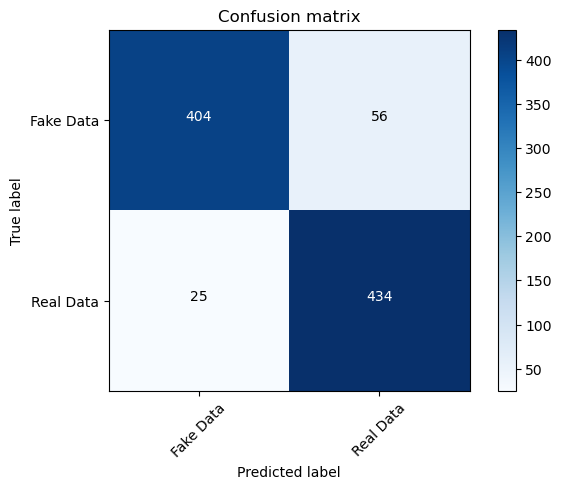

In [40]:
#accuracy score on the test data
Y_pred = LR_model.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'])

### <font color=green> Making a Predictive Model</font>

In [44]:
X_new_LR = X_test[2]

prediction_LR = LR_model.predict(X_new_LR)
print(prediction_LR)

if (prediction_LR[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


### <font color=violet> K-Nearest Neighbors Classifier</font>

In [45]:
KNN_model = KNeighborsClassifier()

In [46]:
KNN_model = KNN_model.fit(X_train, Y_train) 

### <font color=purple> Performance Evaluation</font>

In [47]:
KNN_evaluation_scores = scores(KNN_model, X_train, Y_train, X_test, Y_test)
print_scores_table(KNN_evaluation_scores)

Evaluation Metrics:

Training Set:
Accuracy: 0.8965986394557823
Confusion Matrix:
 [[1783   54]
 [ 326 1512]]
Recall: 0.8226332970620239
F1-Score: 0.8883666274970623

Testing Set:
Accuracy: 0.8596300326441785
Confusion Matrix:
 [[441  19]
 [110 349]]
Recall: 0.7603485838779956
F1-Score: 0.8440145102781138


Accuracy: 85.96%
Confusion matrix, without normalization


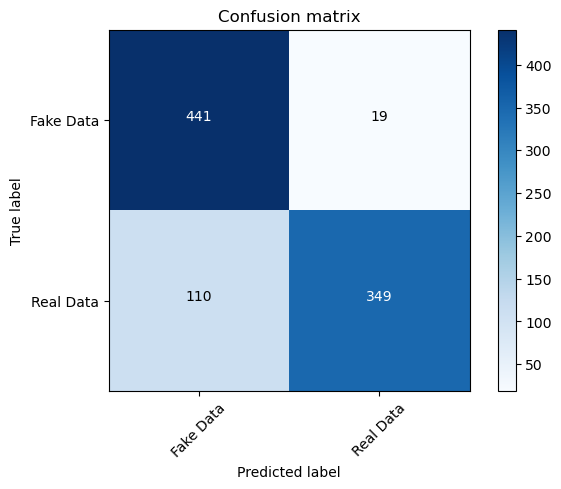

In [49]:
#accuracy score on the test data
Y_pred = KNN_model.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'])

### <font color=green> Making a Predictive Model</font>

In [50]:
X_new_KNN = X_test[3]

prediction_KNN = KNN_model.predict(X_new_KNN)
print(prediction_KNN)

if (prediction_KNN[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


### <font color=violet> Support Vector Machine </font>

In [56]:
SVM_model = svm.SVC(probability=True)

In [57]:
SVM_model = SVM_model.fit(X_train, Y_train) 

### <font color=purple> Performance Evaluation</font>

In [54]:
SVM_evaluation_scores = scores(SVM_model, X_train, Y_train, X_test, Y_test)
print_scores_table(SVM_evaluation_scores)

Evaluation Metrics:

Training Set:
Accuracy: 0.996734693877551
Confusion Matrix:
 [[1830    7]
 [   5 1833]]
Recall: 0.9972796517954298
F1-Score: 0.9967373572593801

Testing Set:
Accuracy: 0.9205658324265505
Confusion Matrix:
 [[409  51]
 [ 22 437]]
Recall: 0.9520697167755992
F1-Score: 0.9229144667370645


Accuracy: 92.06%
Confusion matrix, without normalization


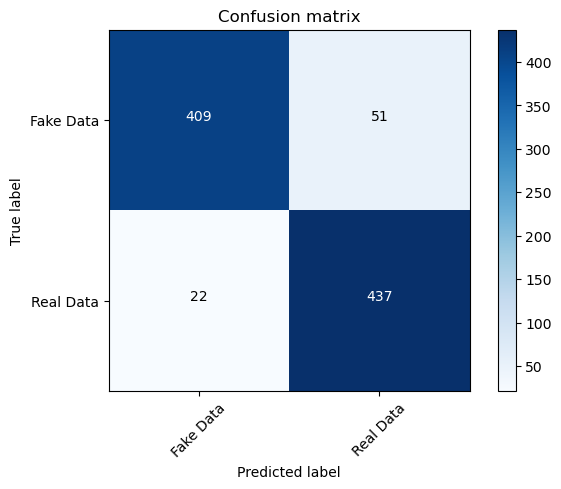

In [58]:
#accuracy score on the test data
Y_pred = SVM_model.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'])

### <font color=green> Making a Predictive Model</font>

In [59]:
X_new_SVM = X_test[2]

prediction_SVM = SVM_model.predict(X_new_SVM)
print(prediction_SVM)

if (prediction_SVM[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


### <font color=violet> Decision Tree</font>

In [60]:
# applying Pre-Pruning techniques to control tree complexity during the growth phase
DT_model = tree.DecisionTreeClassifier(           
      max_depth=3,          # limiting the depth of the tree
      min_samples_split=5,  # minimum samples to create a split
      min_samples_leaf=2    # minimum samples in a leaf node 
)

In [61]:
DT_model = DT_model.fit(X_train, Y_train) 

### <font color=purple> Performance Evaluation</font>

In [62]:
DT_evaluation_scores = scores(DT_model, X_train, Y_train, X_test, Y_test)
print_scores_table(DT_evaluation_scores)

Evaluation Metrics:

Training Set:
Accuracy: 0.8293877551020408
Confusion Matrix:
 [[1435  402]
 [ 225 1613]]
Recall: 0.8775843307943417
F1-Score: 0.8372696600051908

Testing Set:
Accuracy: 0.8161044613710555
Confusion Matrix:
 [[358 102]
 [ 67 392]]
Recall: 0.8540305010893247
F1-Score: 0.8226652675760756


Accuracy: 81.61%
Confusion matrix, without normalization


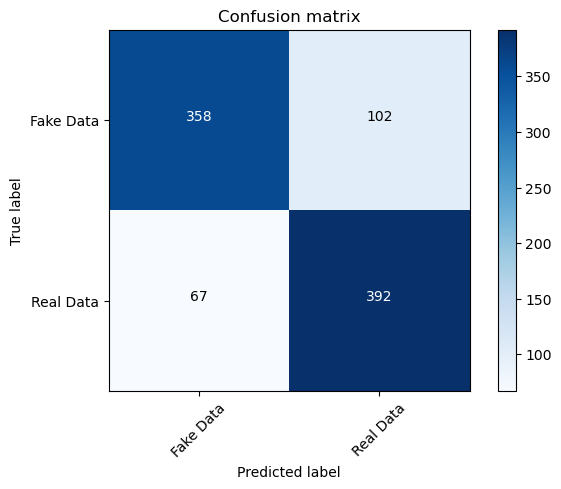

In [63]:
#accuracy score on the test data
Y_pred = DT_model.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'])

### <font color=green> Making a Predictive Model</font>

In [64]:
X_new_DT = X_test[3]
prediction_DT = DT_model.predict(X_new_DT)
print(prediction_DT)

if (prediction_DT[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


### <font color=violet> Multinomial Naive Bayes</font>

In [65]:
MNB_model = MultinomialNB() 

In [66]:
MNB_model = MNB_model.fit(X_train, Y_train) 

### <font color=purple> Performance Evaluation</font>

In [67]:
MNB_evaluation_scores = scores(MNB_model, X_train, Y_train, X_test, Y_test)
print_scores_table(MNB_evaluation_scores)

Evaluation Metrics:

Training Set:
Accuracy: 0.8868027210884354
Confusion Matrix:
 [[1810   27]
 [ 389 1449]]
Recall: 0.7883569096844396
F1-Score: 0.8744719372359686

Testing Set:
Accuracy: 0.8356909684439608
Confusion Matrix:
 [[450  10]
 [141 318]]
Recall: 0.6928104575163399
F1-Score: 0.8081321473951715


Accuracy: 83.57%
Confusion matrix, without normalization


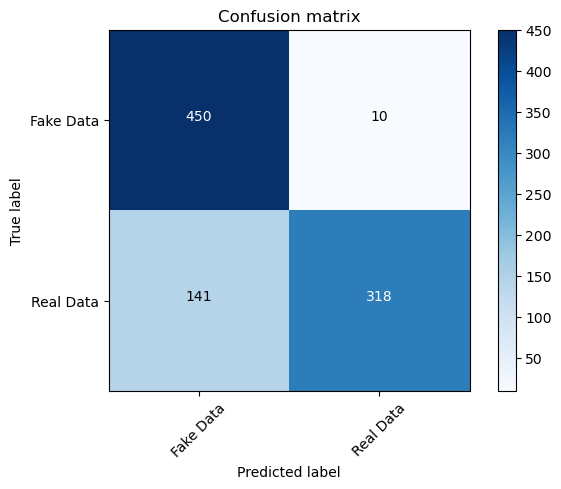

In [68]:
#accuracy score on the test data
Y_pred = MNB_model.predict(X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['Fake Data', 'Real Data'])

### <font color=green> Making a Predictive Model</font>

In [60]:
X_new_MNB = X_test[3]

prediction_MNB = LR_model.predict(X_new_MNB)
print(prediction_MNB)

if (prediction_MNB[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real
